In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

2022-10-03 00:54:33.302753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-03 00:54:33.302771: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = keras.models.load_model("trained.model")

WIDTH, HEIGHT = 20, 20
IMAGE_SIZE = (WIDTH, HEIGHT)

2022-10-03 00:54:37.853327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-03 00:54:37.853381: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-03 00:54:37.853430: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x1): /proc/driver/nvidia/version does not exist
2022-10-03 00:54:37.854217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "all_data",
    shuffle = False,
    color_mode = "grayscale",
    image_size = IMAGE_SIZE,
    batch_size = 22923
)

Found 22923 files belonging to 9 classes.


In [15]:
for o in testing_ds:
    print(o)
    break

(<tf.Tensor: shape=(22923, 20, 20, 1), dtype=float32, numpy=
array([[[[174.6     ],
         [184.4     ],
         [174.8     ],
         ...,
         [179.      ],
         [181.4     ],
         [175.8     ]],

        [[175.      ],
         [180.4     ],
         [183.      ],
         ...,
         [178.40001 ],
         [177.4     ],
         [173.8     ]],

        [[180.      ],
         [179.      ],
         [182.      ],
         ...,
         [175.      ],
         [178.      ],
         [178.      ]],

        ...,

        [[179.      ],
         [175.      ],
         [181.      ],
         ...,
         [173.      ],
         [183.      ],
         [178.      ]],

        [[182.6     ],
         [176.20001 ],
         [170.      ],
         ...,
         [168.20001 ],
         [173.20001 ],
         [177.2     ]],

        [[181.6     ],
         [182.4     ],
         [177.19998 ],
         ...,
         [163.2     ],
         [172.79999 ],
         [180.8     ]]],



In [5]:
images, labels = next(testing_ds.as_numpy_iterator())

model_prediction = model.predict(images)
predictions = np.argmax(model_prediction, 1)

717/717 [==============================] - 2s 2ms/step


In [8]:
wrong = (labels != predictions)
wrong_images = images[wrong]
wrong_labels = labels[wrong]
wrong_predictions = predictions[wrong]

print(f"Got {len(wrong_images)} out of {len(images)} predictions wrong")

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

Got 951 out of 22923 predictions wrong


array([[2203,   50,    0,    0,    1,    0,  293,    0,    0],
       [   3, 2541,    0,    0,    0,    0,    2,    1,    0],
       [   3,   17, 2491,    0,   11,    0,   10,   14,    1],
       [   4,  259,    0, 2262,    0,    0,   14,    4,    4],
       [   0,    4,    2,    0, 2535,    0,    1,    5,    0],
       [   0,    5,    0,    6,   69, 2424,    0,   43,    0],
       [   1,    1,    0,    0,    0,    0, 2545,    0,    0],
       [   3,   13,    0,    0,    9,    0,    4, 2518,    0],
       [   6,   44,    3,    1,   11,    0,   22,    7, 2453]],
      dtype=int32)

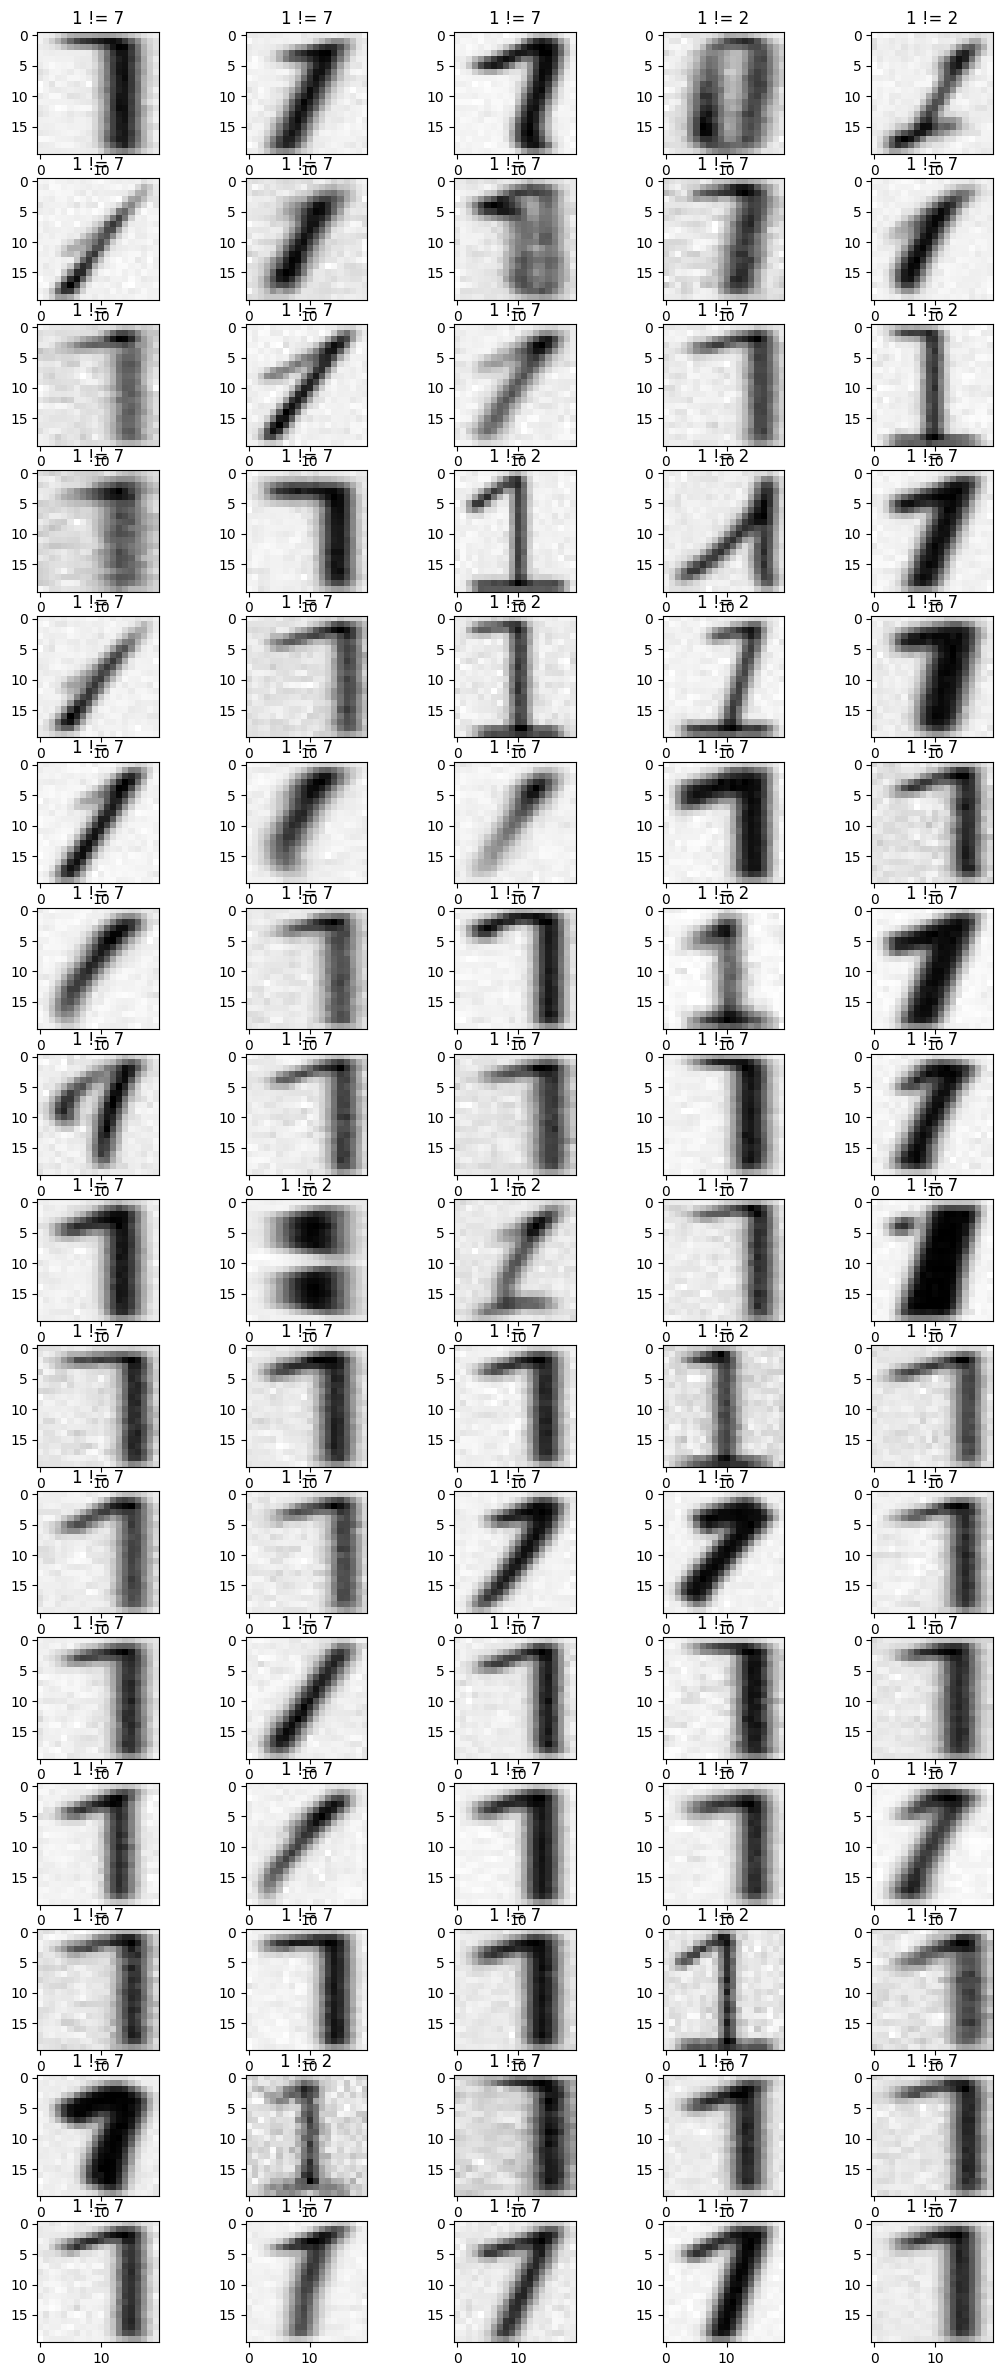

In [9]:
fig = plt.figure(figsize=(13, 30))
columns = 5
rows = 16

ax = []

for i in range(min(wrong_images.shape[0], columns*rows)):
    img = wrong_images[i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(f"{wrong_labels[i]+1} != {wrong_predictions[i]+1}")
    plt.imshow(img.reshape(WIDTH, HEIGHT), cmap="gray")

plt.show()
